In [50]:
import pandas as pd
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('data/processed_data.csv')

In [30]:
df

,Unnamed: 0,text,yoga,therapy,workout,Processed_tweet
0,0,RT @FundraiserDan: Keep reminding yourself thi...,0,0,0,@FundraiserDan: Keep reminding this: Burning m...
1,1,#Fight #VeteransUnite #Veterans #VeteransAware...,0,0,0,#Fight #VeteransUnite #Veterans #VeteransAware...
2,2,You may say I'm a dreamer.. #Lennon\n\n#JoyTra...,0,0,0,You may say I'm dreamer.. #Lennon #JoyTrain #J...
3,3,Ready To Press DTF Transfer With GOD All Thing...,0,0,0,Ready To Press DTF Transfer With GOD All Thing...
4,4,RT @OkeloJavan: Mental health is an important ...,0,0,0,@OkeloJavan: Mental health important topic nev...
...,...,...,...,...,...,...
4995,4995,#mEntalhEalth #mindfulness #softness #meditati...,1,0,0,#mEntalhEalth #mindfulness #softness #meditati...
4996,4996,Let’s talk about #mental #health with storyboo...,0,0,0,Let’s talk #mental #health storybook . #Author...
4997,4997,RT @hemi_taylor: #icewaterbather it’s the get...,0,0,1,@hemi_taylor: #icewaterbather it’s getting hur...
4998,4998,RT @LEAD_Coalition: Taking a break helps impro...,0,0,0,@LEAD_Coalition: Taking break help improve #we...


In [31]:
df['polarity'] = df['Processed_tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed_tweet'].apply(lambda x: TextBlob(x).sentiment[1])

In [32]:
df

,Unnamed: 0,text,yoga,therapy,workout,Processed_tweet,polarity,subjectivity
0,0,RT @FundraiserDan: Keep reminding yourself thi...,0,0,0,@FundraiserDan: Keep reminding this: Burning m...,0.366667,0.750000
1,1,#Fight #VeteransUnite #Veterans #VeteransAware...,0,0,0,#Fight #VeteransUnite #Veterans #VeteransAware...,0.000000,0.000000
2,2,You may say I'm a dreamer.. #Lennon\n\n#JoyTra...,0,0,0,You may say I'm dreamer.. #Lennon #JoyTrain #J...,0.650000,0.400000
3,3,Ready To Press DTF Transfer With GOD All Thing...,0,0,0,Ready To Press DTF Transfer With GOD All Thing...,0.100000,0.750000
4,4,RT @OkeloJavan: Mental health is an important ...,0,0,0,@OkeloJavan: Mental health important topic nev...,0.150000,0.600000
...,...,...,...,...,...,...,...,...
4995,4995,#mEntalhEalth #mindfulness #softness #meditati...,1,0,0,#mEntalhEalth #mindfulness #softness #meditati...,-0.100000,0.541667
4996,4996,Let’s talk about #mental #health with storyboo...,0,0,0,Let’s talk #mental #health storybook . #Author...,-0.100000,0.200000
4997,4997,RT @hemi_taylor: #icewaterbather it’s the get...,0,0,1,@hemi_taylor: #icewaterbather it’s getting hur...,0.000000,0.000000
4998,4998,RT @LEAD_Coalition: Taking a break helps impro...,0,0,0,@LEAD_Coalition: Taking break help improve #we...,0.000000,0.000000


In [35]:
display(df[df['yoga']==1][['yoga','polarity','subjectivity']].groupby('yoga').agg([np.mean, np.max, np.min, np.median]))
display(df[df['therapy']==1][['therapy','polarity','subjectivity']].groupby('therapy').agg([np.mean, np.max, np.min, np.median]))
display(df[df['workout']==1][['workout','polarity','subjectivity']].groupby('workout').agg([np.mean, np.max, np.min, np.median]))

polarity                      subjectivity                    
          mean  amax    amin median         mean amax amin    median
yoga                                                                
1     0.136811  0.85 -0.1875    0.0     0.296033  1.0  0.0  0.142857

polarity                    subjectivity                 
             mean amax   amin median         mean amax amin median
therapy                                                           
1        0.069201  1.0 -0.875    0.0     0.264138  1.0  0.0   0.05

polarity                   subjectivity                    
             mean amax  amin median         mean amax amin    median
workout                                                             
1        0.075309  1.0 -0.25    0.0     0.241113  1.0  0.0  0.076923

# Visualization

<BarContainer object of 3 artists>

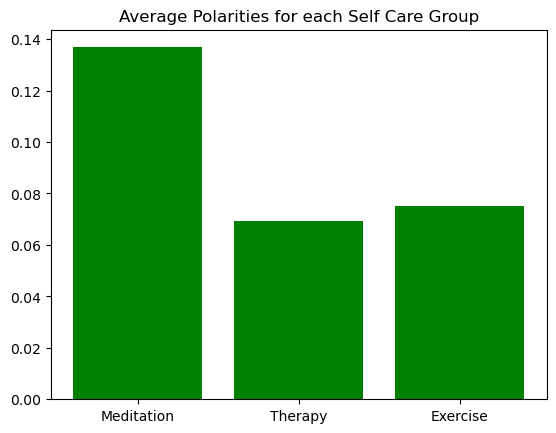

In [151]:
plt.title('Average Polarities for each Self Care Group')

polarities = []
groups = ['Meditation', 'Therapy', 'Exercise']

polarities.append(df[df['yoga'] == 1]['polarity'].mean())
polarities.append(df[df['therapy'] == 1]['polarity'].mean())
polarities.append(df[df['workout'] == 1]['polarity'].mean())

plt.bar(groups, polarities, color='green')

<BarContainer object of 3 artists>

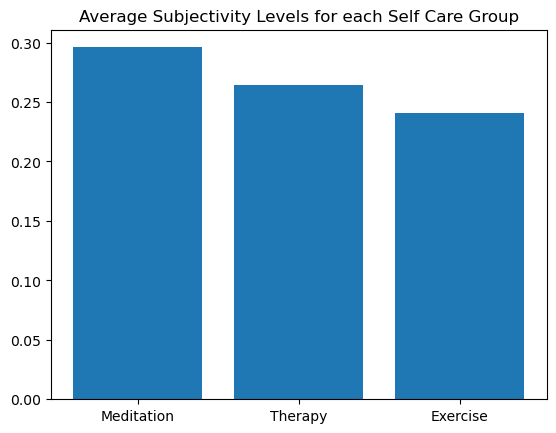

In [152]:
plt.title('Average Subjectivity Levels for each Self Care Group')

subjectivites = []

subjectivites.append(df[df['yoga'] == 1]['subjectivity'].mean())
subjectivites.append(df[df['therapy'] == 1]['subjectivity'].mean())
subjectivites.append(df[df['workout'] == 1]['subjectivity'].mean())

plt.bar(groups, subjectivites)

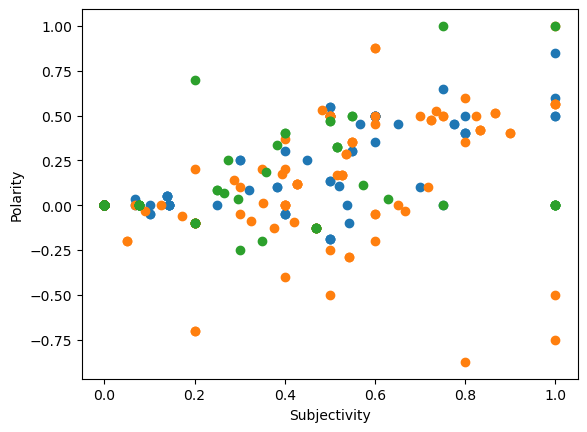

In [150]:
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')

plt.scatter(df[df['yoga'] == 1].subjectivity, df[df['yoga'] == 1].polarity)
plt.scatter(df[df['therapy'] == 1].subjectivity, df[df['therapy'] == 1].polarity)
plt.scatter(df[df['workout'] == 1].subjectivity, df[df['workout'] == 1].polarity)